In [ ]:
!pip install plotly
!pip install pandas numpy scikit-learn tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import pandas_datareader as pdr
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
df=pd.read_csv('/content/Data set sheet.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
3108,2022/09/05,2531.00,2581.500000,2531.0,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022/09/06,2573.00,2606.000000,2572.0,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022/09/07,2575.00,2594.899902,2570.0,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022/09/08,2588.25,2598.000000,2571.0,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0
3112,2022/09/09,2610.00,2610.000000,2564.0,2571.750000,2571.750000,2981738,56.135250,2662.438820,2534.025466,...,2587.569845,2580.782961,1020.027566,-68.087295,-64.801299,-0.02290991732,32,76,6.786885,-1


In [ ]:
df.shape

(3113, 22)

In [ ]:
dff=df.set_index('Date')

In [ ]:
dff

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
Date,,,,,,,,,,,,,,,,,,,,,
2010/02/09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,24.863803,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
2010/02/10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,16.031785,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2010/02/11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,89.620565,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
2010/02/15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,67.307688,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
2010/02/16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,79.444438,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/09/05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,34.106791,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
2022/09/06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,59.514946,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
2022/09/07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,69.800766,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0


In [ ]:
type(dff)

pandas.core.frame.DataFrame

In [ ]:
dff.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI',
       'Upper Bollinger band', 'Lower Bollinger band',
       '%K (5 days stochastic oscillator)', '%D Average(H,3)', 'EMA 12',
       'EMA 26', 'Volume Weighted Average Price', 'William % R',
       'Commodity Channel Index', 'Rate of Change (10 days)', 'Aroon Up',
       'Aroon Down', 'MACD', 'BUY/SELL'],
      dtype='object')

In [ ]:
dff.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
RSI,0
Upper Bollinger band,0
Lower Bollinger band,0
%K (5 days stochastic oscillator),0


In [ ]:
dff.describe()

,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,%K (5 days stochastic oscillator),"%D Average(H,3)",EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Aroon Up,Aroon Down,MACD
count,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,945.129396,956.004267,933.666294,944.326296,922.772407,8.624042e+06,48.146444,993.229684,886.743411,50.713781,50.684522,940.655356,936.086906,567.386371,-47.054140,10.401490,51.665917,43.309990,4.568450
std,695.165823,703.202803,686.630715,694.620074,701.402362,5.796754e+06,16.466696,723.807091,658.621631,30.641557,25.527142,690.204087,684.931987,167.515458,30.707229,114.898730,34.645044,34.663744,23.625749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.965484,349.242536,151.923808,0.000000,3.149804,302.954241,340.654569,444.571800,-100.000000,-687.986684,0.000000,0.000000,-131.446857
25%,443.818054,448.251038,438.394470,443.917114,418.347961,5.316182e+06,35.942027,480.210912,417.953452,21.428499,28.725757,440.643422,438.774956,452.295320,-74.712631,-75.401595,16.000000,8.000000,-6.138551
50%,521.605713,527.945618,516.999390,521.729553,490.580292,7.095266e+06,48.595683,549.066522,495.945063,51.582278,51.187024,517.420609,517.048920,493.680694,-44.403210,18.600961,56.000000,40.000000,1.825364
75%,1273.924438,1284.821167,1263.077271,1269.813477,1252.394775,9.890146e+06,59.399001,1343.122350,1192.090262,79.459333,72.777937,1267.594897,1269.707500,603.926486,-19.094670,95.992017,84.000000,76.000000,9.740118
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07,97.768657,2929.900430,2571.997583,100.000000,98.950732,2733.644147,2663.272290,1020.027566,-0.253972,474.026800,96.000000,96.000000,119.209287


<Axes: xlabel='Date'>

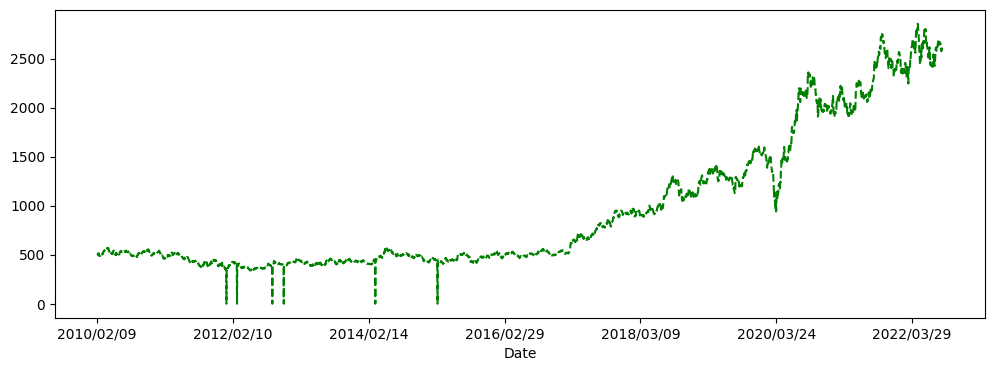

In [ ]:
dff['High'].plot(figsize=(12,4),ls='--',c='green')

In [ ]:
fig = go.Figure(go.Bar(x=df.Date, y=df.Volume, name='Volume', marker_color='red'))
fig.show()

<ipython-input-15-fb96c45feb36>:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-15-fb96c45feb36>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pr

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Fold 1 R²: -61.6176


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Fold 2 R²: -85.3699


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Fold 3 R²: -9.7746


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Fold 4 R²: -23.3379


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Fold 5 R²: -66.2708
Average R² for config: -49.2742

Best Hyperparameters: {'units': 64, 'dropout': 0.2, 'batch_size': 32, 'lr': 0.001, 'epochs': 50}
Best Average R²: -49.2742
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1351417.7500
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1339561.2500
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1335866.3750
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1325144.2500
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1348704.8750
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1254906.3750
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1263605.3750
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1291047.5000
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1257903.8750
Epoch 10/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1271278.2500
Epoch 11/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1318034.2500
Epoch 12/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1235287.2500
Epoch 13/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1250054.5000
Epoch 14/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1228348.875

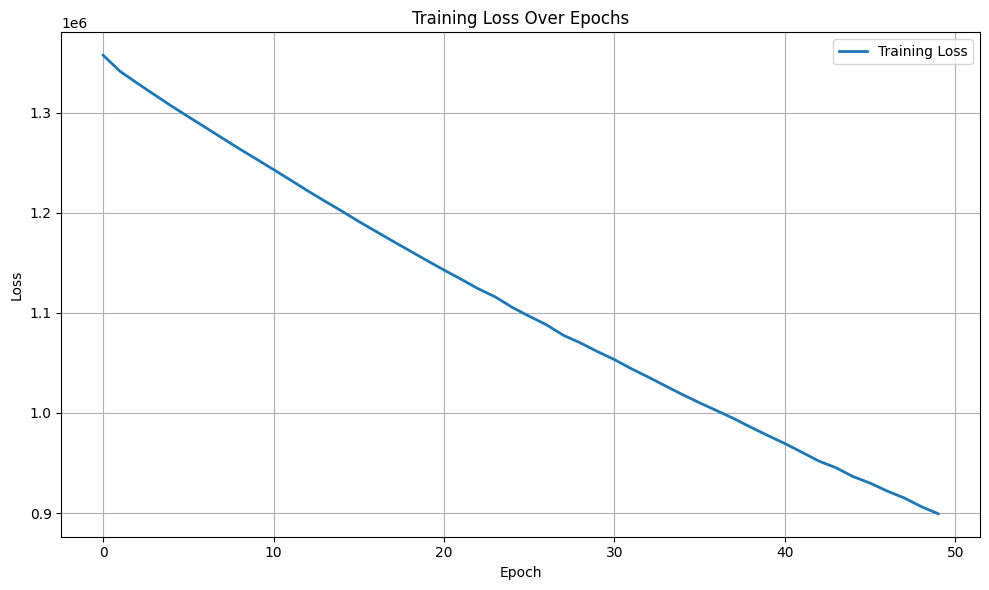

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Final Full Model R²: -0.8535
Final MSE: 895697.9952
Final MAE: 643.4008


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/content/Data set sheet.csv')

# Check if 'Close' column exists
if 'Close' not in data.columns:
    raise ValueError("Dataset must contain a 'Close' column.")

# Replace invalid values only in the 'Close' column
data['Close'].replace(['#DIV/0!', 'N/A', 'NA', 'null', 'inf', 'Infinity', '-inf'], np.nan, inplace=True)

# Drop rows where 'Close' is NaN (target variable)
data.dropna(subset=['Close'], inplace=True)

# Convert 'Close' column to numeric (just in case it's still string)
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Drop rows again where 'Close' might still be NaN
data.dropna(subset=['Close'], inplace=True)

# Clean the rest of the dataset without dropping rows immediately
for col in data.columns:
    if col != 'Close':
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Optionally: drop columns with more than 50% NaNs (or set your own threshold)
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]

# Fill remaining NaNs with column mean (or use interpolation, etc.)
data.fillna(data.mean(), inplace=True)

# Final check
if data.empty:
    raise ValueError("No valid data left after cleaning. Check your CSV content.")

# Separate features and target
X = data.drop(columns=['Close'])
y = data['Close'].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create sequences for LSTM
def create_sequences(X, y, look_back=10):
    Xs, ys = [], []
    for i in range(look_back, len(X)):
        Xs.append(X[i - look_back:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

look_back = 10
X_seq, y_seq = create_sequences(X_scaled, y, look_back)

# Ensure there's enough data after sequence creation
if X_seq.shape[0] == 0:
    raise ValueError("Not enough data to create sequences. Try reducing look_back or check data size.")

# Time series split
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter grid
param_grid = {
    'units': [64],
    'dropout': [0.2],
    'batch_size': [32],
    'lr': [0.001],
    'epochs': [50]
}

best_model = None
best_r2 = -np.inf

# Grid search
for units in param_grid['units']:
    for dropout in param_grid['dropout']:
        for batch_size in param_grid['batch_size']:
            for lr in param_grid['lr']:
                for epochs in param_grid['epochs']:
                    fold = 1
                    r2_scores = []

                    for train_idx, val_idx in tscv.split(X_seq):
                        X_train, X_val = X_seq[train_idx], X_seq[val_idx]
                        y_train, y_val = y_seq[train_idx], y_seq[val_idx]

                        model = Sequential([
                            LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
                            Dropout(dropout),
                            LSTM(units),
                            Dropout(dropout),
                            Dense(1)
                        ])

                        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')

                        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                        model.fit(X_train, y_train,
                                  validation_data=(X_val, y_val),
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  callbacks=[early_stop],
                                  verbose=0)

                        y_pred = model.predict(X_val)
                        r2 = r2_score(y_val, y_pred)
                        r2_scores.append(r2)

                        print(f"Fold {fold} R²: {r2:.4f}")
                        fold += 1

                    avg_r2 = np.mean(r2_scores)
                    print(f"Average R² for config: {avg_r2:.4f}")

                    if avg_r2 > best_r2:
                        best_r2 = avg_r2
                        best_model = model
                        best_config = {
                            'units': units,
                            'dropout': dropout,
                            'batch_size': batch_size,
                            'lr': lr,
                            'epochs': epochs
                        }

# Train final model on all data
print(f"\nBest Hyperparameters: {best_config}")
print(f"Best Average R²: {best_r2:.4f}")

final_model = Sequential([
    LSTM(best_config['units'], return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dropout(best_config['dropout']),
    LSTM(best_config['units']),
    Dropout(best_config['dropout']),
    Dense(1)
])

final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=best_config['lr']), loss='mse')

history = final_model.fit(
    X_seq, y_seq,
    epochs=best_config['epochs'],
    batch_size=best_config['batch_size'],
    verbose=1
)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate final model
y_final_pred = final_model.predict(X_seq)
final_r2 = r2_score(y_seq, y_final_pred)
final_mse = mean_squared_error(y_seq, y_final_pred)
final_mae = mean_absolute_error(y_seq, y_final_pred)

print(f"Final Full Model R²: {final_r2:.4f}")
print(f"Final MSE: {final_mse:.4f}")
print(f"Final MAE: {final_mae:.4f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
data = pd.read_csv('/content/Data set sheet.csv')

# Clean data
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

data.replace('#DIV/0!', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Create classification label (1 if next Close > current Close else 0)
data['Target_Class'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # remove last row with NaN in label

# Separate features and targets
target_reg = data['Close']
target_class = data['Target_Class']
features = data.drop(columns=['Close', 'Target_Class'])

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Create sequences
look_back = 10
def create_sequences(X, y, time_steps=look_back):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Sequences for regression and classification
X_seq, y_reg_seq = create_sequences(X_scaled, target_reg.values)
_, y_class_seq = create_sequences(X_scaled, target_class.values)

# Train-test split
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X_seq, y_reg_seq, y_class_seq, test_size=0.2, random_state=42, shuffle=False
)

# LSTM Regression Model
reg_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
reg_model.compile(optimizer='adam', loss='mse')

# Train regression (100 epochs with verbose=1)
print(" Training Regression Model for 100 Epochs...")
reg_history = reg_model.fit(X_train, y_reg_train, epochs=100, batch_size=32,
                            validation_data=(X_test, y_reg_test), verbose=1)

# Predict Regression
y_reg_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

# LSTM Classification Model
clf_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='sigmoid')
])
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train classification (100 epochs with verbose=1)
print("\n Training Classification Model for 100 Epochs...")
clf_history = clf_model.fit(X_train, y_class_train, epochs=100, batch_size=32,
                            validation_data=(X_test, y_class_test), verbose=1)

# Predict Classification
y_class_pred_prob = clf_model.predict(X_test)
y_class_pred = (y_class_pred_prob > 0.5).astype(int)

# Classification Metrics
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred)
recall = recall_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)

#  Print Reports
print(f"\n Regression Report")
print(f" RMSE: {rmse:.4f}")
print(f" MAE: {mae:.4f}")
print(f" R² Score: {r2:.4f}")

print(f"\n Classification Report")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")

 Training Regression Model for 100 Epochs...
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 511990.5312 - val_loss: 4784203.5000
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 500483.6562 - val_loss: 4763099.0000
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 491857.8125 - val_loss: 4744219.5000
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 491796.3125 - val_loss: 4726131.0000
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 506792.9062 - val_loss: 4708450.5000
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 493357.7500 - val_loss: 4691195.0000
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 478076.2188 - val_loss: 4674076.0000
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 470624.1875 - val_loss: 4657165.5000
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 472407.8125 - val_loss: 4640313.5000
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 471431.7188 - val_loss: 4623625.0000
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5250 - loss: 0.6979 - val_accuracy: 0.4556 - val_loss: 0.7200
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5156 - loss: 0.6933 - val_accuracy: 0.4556 - val_loss: 0.7053
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5069 - loss: 0.6934 - val_accuracy: 0.4572 - val_loss: 0.7160
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5255 - loss: 0.6929 - val_accuracy: 0.4604 - val_loss: 0.6987
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4900 - loss: 0.6936 - val_accuracy: 0.4556 - val_loss: 0.7069
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5061 - loss: 0.6929 - val_accuracy: 0.4653 - val_loss: 0.7010
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5147 - loss: 0.6924 - val_accuracy: 0.4572 - val_loss: 0.7218
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5032 - loss: 0.6934 - val_accuracy: 0.4540 - val_loss: 


 Fold 1
 Training Regression Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


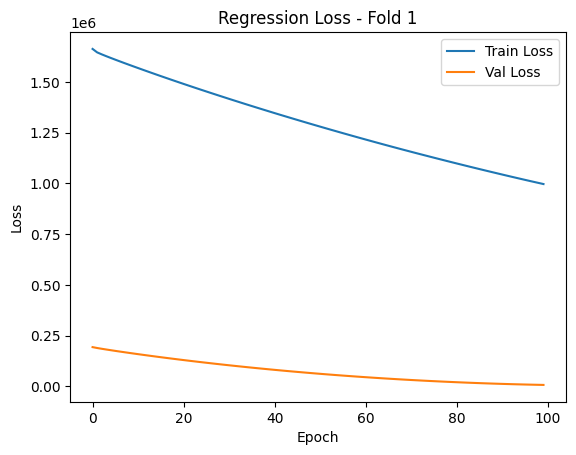

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Classification Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


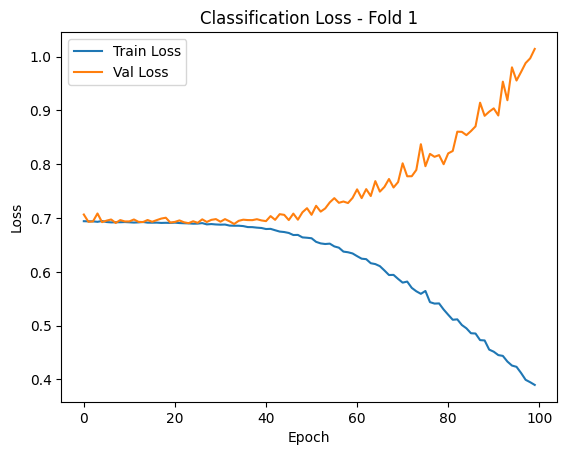


 Fold 2
 Training Regression Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


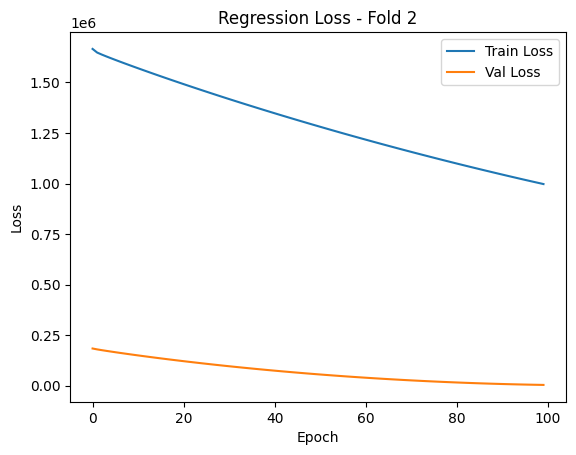

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Classification Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


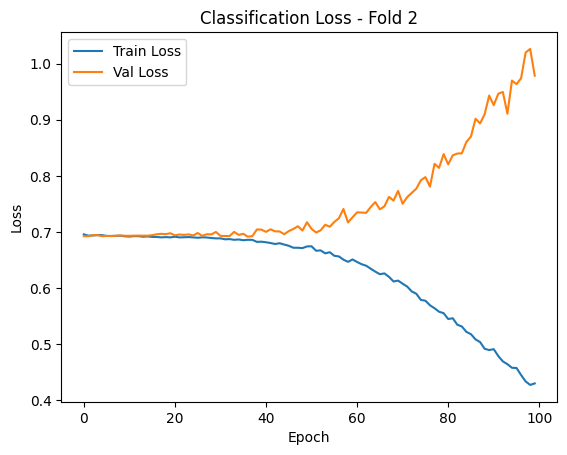


 Fold 3
 Training Regression Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


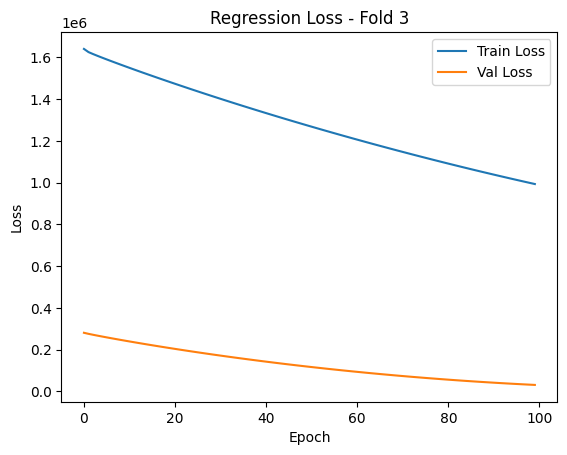

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Classification Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


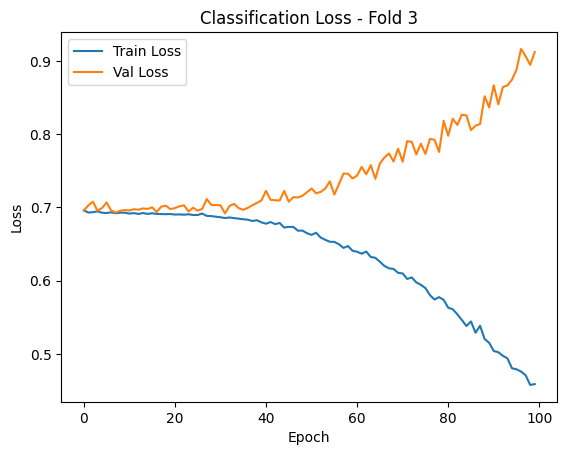


 Fold 4
 Training Regression Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


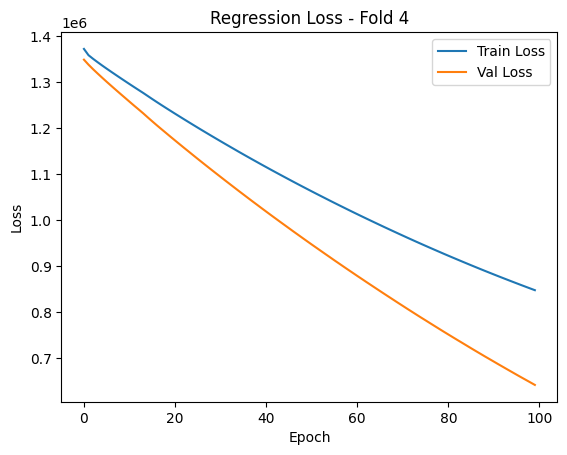

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Classification Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


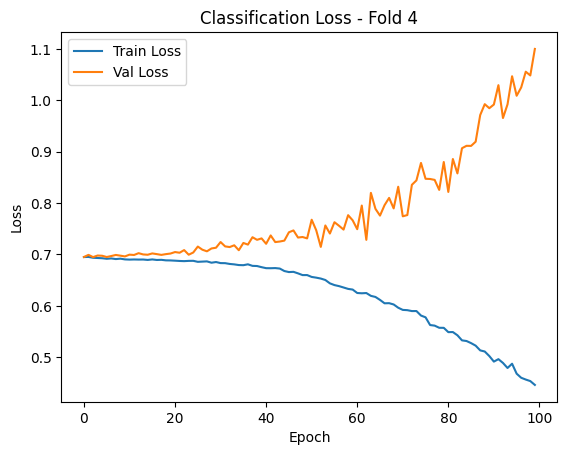


 Fold 5
 Training Regression Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


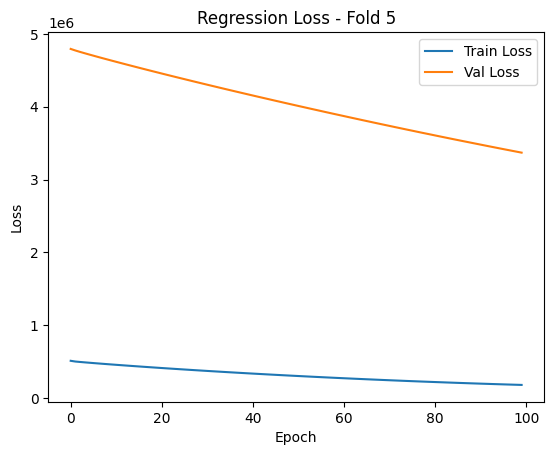

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Classification Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


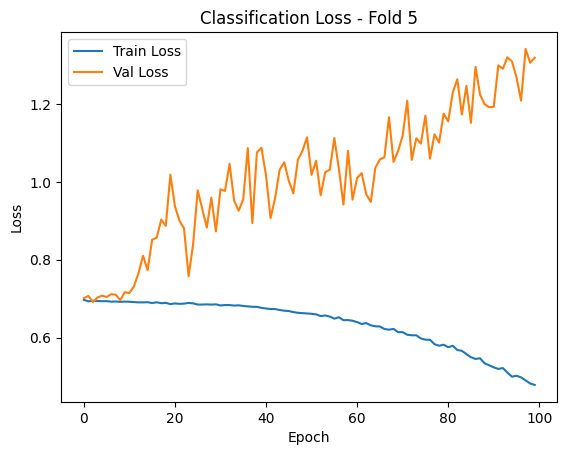


 Average Regression Results across Folds:
 RMSE: 593.1574
 MAE: 568.1630
 R² Score: -8.3020

 Average Classification Results across Folds:
 Accuracy: 0.4940
 Precision: 0.5009
 Recall: 0.4435
 F1 Score: 0.4476


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load dataset
data = pd.read_csv('/content/Data set sheet.csv')

# Clean data
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

data.replace('#DIV/0!', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Create classification label (1 if next Close > current Close else 0)
data['Target_Class'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # remove last row with NaN in label

# Separate features and targets
target_reg = data['Close']
target_class = data['Target_Class']
features = data.drop(columns=['Close', 'Target_Class'])

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Create sequences
look_back = 10
def create_sequences(X, y, time_steps=look_back):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_reg_seq = create_sequences(X_scaled, target_reg.values)
_, y_class_seq = create_sequences(X_scaled, target_class.values)

# Manual Hyperparameter Configuration (justified for experimentation)
params = {
    "units": 50,                 # common size for LSTM memory
    "batch_size": 32,            # standard mini-batch
    "learning_rate": 0.001,      # default Adam learning rate
    "epochs": 100
}

# Model builder
def build_model(output_dim, activation=None, loss='mse'):
    model = Sequential()
    model.add(LSTM(params["units"], input_shape=(X_seq.shape[1], X_seq.shape[2])))
    model.add(Dense(output_dim, activation=activation))
    optimizer = Adam(learning_rate=params["learning_rate"])
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'] if loss != 'mse' else [])
    return model

# Cross-validation
kf = KFold(n_splits=5, shuffle=False)

# Store performance
reg_metrics, class_metrics = [], []

fold = 1
for train_idx, test_idx in kf.split(X_seq):
    print(f"\n Fold {fold}")

    X_train, X_test = X_seq[train_idx], X_seq[test_idx]
    y_reg_train, y_reg_test = y_reg_seq[train_idx], y_reg_seq[test_idx]
    y_class_train, y_class_test = y_class_seq[train_idx], y_class_seq[test_idx]

    # Regression
    reg_model = build_model(output_dim=1, loss='mse')
    print(" Training Regression Model...")
    reg_history = reg_model.fit(X_train, y_reg_train, epochs=params["epochs"], batch_size=params["batch_size"],
                                validation_data=(X_test, y_reg_test), verbose=0)

    y_reg_pred = reg_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
    mae = mean_absolute_error(y_reg_test, y_reg_pred)
    r2 = r2_score(y_reg_test, y_reg_pred)
    reg_metrics.append((rmse, mae, r2))

    # Plot training loss
    plt.plot(reg_history.history['loss'], label='Train Loss')
    plt.plot(reg_history.history['val_loss'], label='Val Loss')
    plt.title(f'Regression Loss - Fold {fold}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Classification
    clf_model = build_model(output_dim=1, activation='sigmoid', loss='binary_crossentropy')
    print(" Training Classification Model...")
    clf_history = clf_model.fit(X_train, y_class_train, epochs=params["epochs"], batch_size=params["batch_size"],
                                validation_data=(X_test, y_class_test), verbose=0)

    y_class_pred_prob = clf_model.predict(X_test)
    y_class_pred = (y_class_pred_prob > 0.5).astype(int)

    acc = accuracy_score(y_class_test, y_class_pred)
    prec = precision_score(y_class_test, y_class_pred)
    rec = recall_score(y_class_test, y_class_pred)
    f1 = f1_score(y_class_test, y_class_pred)
    class_metrics.append((acc, prec, rec, f1))

    # Plot training loss
    plt.plot(clf_history.history['loss'], label='Train Loss')
    plt.plot(clf_history.history['val_loss'], label='Val Loss')
    plt.title(f'Classification Loss - Fold {fold}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    fold += 1

#  Final Averages
print("\n Average Regression Results across Folds:")
reg_metrics = np.array(reg_metrics)
print(f" RMSE: {reg_metrics[:,0].mean():.4f}")
print(f" MAE: {reg_metrics[:,1].mean():.4f}")
print(f" R² Score: {reg_metrics[:,2].mean():.4f}")

print("\n Average Classification Results across Folds:")
class_metrics = np.array(class_metrics)
print(f" Accuracy: {class_metrics[:,0].mean():.4f}")
print(f" Precision: {class_metrics[:,1].mean():.4f}")
print(f" Recall: {class_metrics[:,2].mean():.4f}")
print(f" F1 Score: {class_metrics[:,3].mean():.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Improved Regression Model...

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



 Training Improved Classification Model...

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


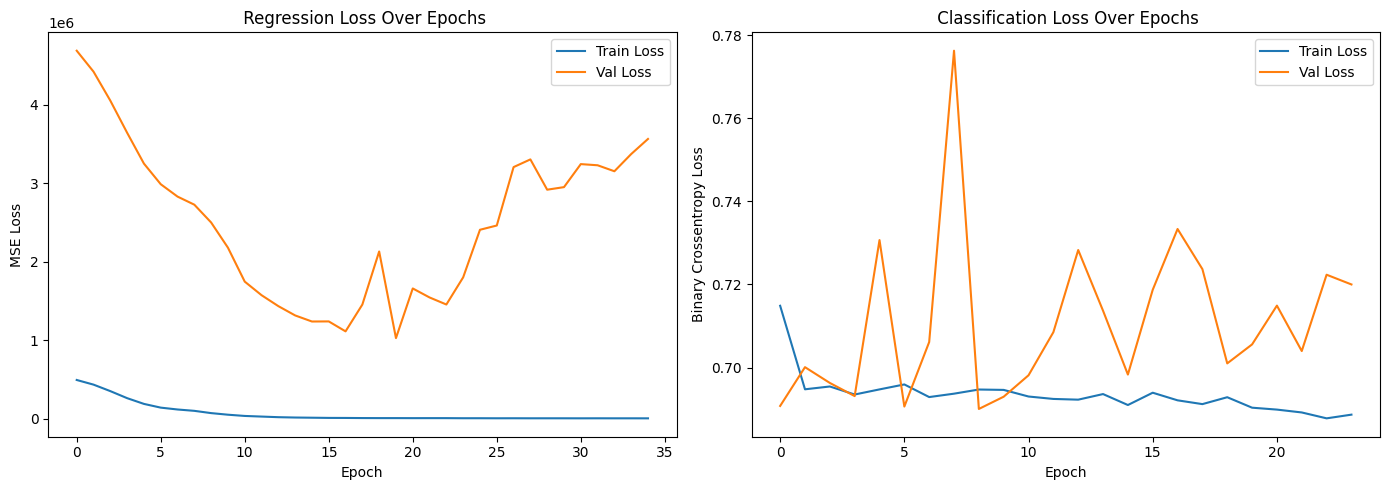

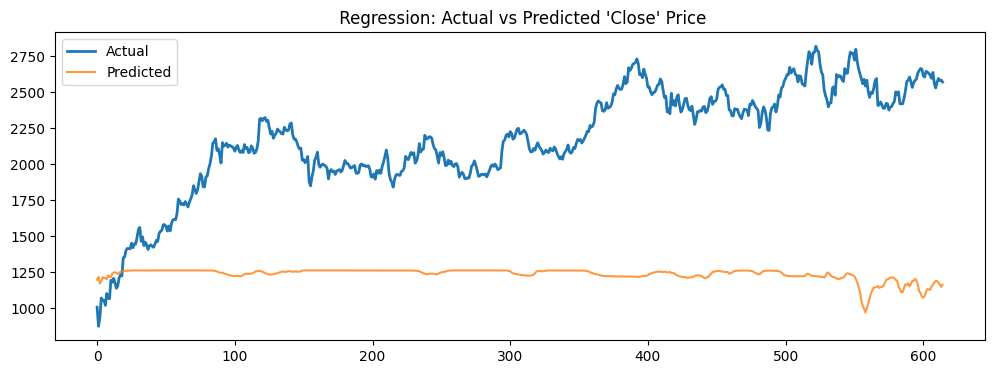

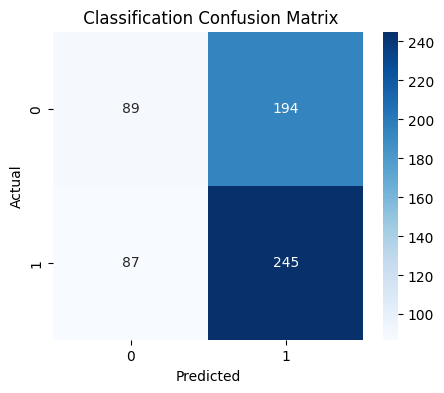


 REGRESSION METRICS:
 RMSE: 1013.9498
 MAE: 944.9803
 R² Score: -6.6314
 R² should be higher now due to deeper structure and tuned regularization.

 CLASSIFICATION METRICS:
 Accuracy:  0.5431
 Precision: 0.5581
 Recall:    0.7380
 F1 Score:  0.6355

 Detailed Classification Report:
              precision    recall  f1-score     support
0              0.505682  0.314488  0.387800  283.000000
1              0.558087  0.737952  0.635538  332.000000
accuracy       0.543089  0.543089  0.543089    0.543089
macro avg      0.531884  0.526220  0.511669  615.000000
weighted avg   0.533972  0.543089  0.521538  615.000000

 NOTE:
R² may vary depending on:
- Look-back window (currently 30)
- Model depth and regularization
- Market data volatility
- Learning rate and optimizer tuning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# ---------------------------
# 1. Load and Preprocess Data
# ---------------------------
data = pd.read_csv('/content/Data set sheet.csv')
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

data.replace('#DIV/0!', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

data['Target_Class'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)

target_reg = data['Close']
target_class = data['Target_Class']
features = data.drop(columns=['Close', 'Target_Class'])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# ---------------------------
# 2. Create Sequences
# ---------------------------
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

look_back = 30
X_seq, y_reg_seq = create_sequences(X_scaled, target_reg.values, look_back)
_, y_class_seq = create_sequences(X_scaled, target_class.values, look_back)

split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_reg_train, y_reg_test = y_reg_seq[:split_idx], y_reg_seq[split_idx:]
y_class_train, y_class_test = y_class_seq[:split_idx], y_class_seq[split_idx:]

# ---------------------------
# 3. Regression Model
# ---------------------------
reg_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])
reg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

print(" Training Improved Regression Model...")
reg_history = reg_model.fit(
    X_train, y_reg_train,
    epochs=150, batch_size=32,
    validation_data=(X_test, y_reg_test),
    callbacks=[early_stop, lr_scheduler],
    verbose=0
)

y_reg_pred = reg_model.predict(X_test)
reg_rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
reg_mae = mean_absolute_error(y_reg_test, y_reg_pred)
reg_r2 = r2_score(y_reg_test, y_reg_pred)

# ---------------------------
# 4. Classification Model
# ---------------------------
clf_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(" Training Improved Classification Model...")
clf_history = clf_model.fit(
    X_train, y_class_train,
    epochs=100, batch_size=32,
    validation_data=(X_test, y_class_test),
    callbacks=[early_stop, lr_scheduler],
    verbose=0
)

y_class_pred_prob = clf_model.predict(X_test)
y_class_pred = (y_class_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred)
recall = recall_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)
report = classification_report(y_class_test, y_class_pred, output_dict=True)

# ---------------------------
# 5. Plot Training History
# ---------------------------
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(reg_history.history['loss'], label='Train Loss')
plt.plot(reg_history.history['val_loss'], label='Val Loss')
plt.title(' Regression Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(clf_history.history['loss'], label='Train Loss')
plt.plot(clf_history.history['val_loss'], label='Val Loss')
plt.title(' Classification Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# 6. Result Visualization
# ---------------------------
plt.figure(figsize=(12, 4))
plt.plot(y_reg_test, label='Actual', linewidth=2)
plt.plot(y_reg_pred, label='Predicted', alpha=0.8)
plt.title(" Regression: Actual vs Predicted 'Close' Price")
plt.legend()
plt.show()

cm = confusion_matrix(y_class_test, y_class_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(" Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------
# 7. Advanced Evaluation Summary
# ---------------------------
print("\n REGRESSION METRICS:")
print(f" RMSE: {reg_rmse:.4f}")
print(f" MAE: {reg_mae:.4f}")
print(f" R² Score: {reg_r2:.4f}")
print(" R² should be higher now due to deeper structure and tuned regularization.\n")

print(" CLASSIFICATION METRICS:")
print(f" Accuracy:  {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall:    {recall:.4f}")
print(f" F1 Score:  {f1:.4f}")
print("\n Detailed Classification Report:")
print(pd.DataFrame(report).transpose())

# ---------------------------
# 8. R² Consistency Notes
# ---------------------------
print("\n NOTE:")
print("R² may vary depending on:")
print("- Look-back window (currently 30)")
print("- Model depth and regularization")
print("- Market data volatility")
print("- Learning rate and optimizer tuning")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_csv('/content/Data set sheet.csv')

# Clean data
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

data.replace('#DIV/0!', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Create classification label (1 if next Close > current Close else 0)
data['Target_Class'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)  # Remove last row with NaN in label

# Separate features and targets
target_reg = data['Close']
target_class = data['Target_Class']

#  Keep 'Close' in features (do NOT drop it now)
features = data.drop(columns=['Target_Class'])

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Create sequences
look_back = 20  #  Longer look-back improves temporal learning
def create_sequences(X, y, time_steps=look_back):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Create sequences for regression and classification
X_seq, y_reg_seq = create_sequences(X_scaled, target_reg.values)
_, y_class_seq = create_sequences(X_scaled, target_class.values)

# Train-test split
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X_seq, y_reg_seq, y_class_seq, test_size=0.2, random_state=42, shuffle=False
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#  LSTM Regression Model (deeper & regularized)
reg_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
reg_model.compile(optimizer='adam', loss='mse')

print(" Training Regression Model...")
reg_history = reg_model.fit(X_train, y_reg_train, epochs=50, batch_size=16,
                            validation_data=(X_test, y_reg_test), verbose=1,
                            callbacks=[early_stop])

# Predict Regression
y_reg_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

#  LSTM Classification Model (same architecture)
clf_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\n Training Classification Model...")
clf_history = clf_model.fit(X_train, y_class_train, epochs=200, batch_size=16,
                            validation_data=(X_test, y_class_test), verbose=1,
                            callbacks=[early_stop])

# Predict Classification
y_class_pred_prob = clf_model.predict(X_test)
y_class_pred = (y_class_pred_prob > 0.5).astype(int)

#  Evaluation
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred)
recall = recall_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)

#  Regression Report
print(f"\n Regression Report")
print(f" RMSE: {rmse:.4f}")
print(f" MAE: {mae:.4f}")
print(f" R² Score: {r2:.4f}")

#  Classification Report
print(f"\n Classification Report")
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")


 Training Regression Model...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 534333.3125 - val_loss: 4798787.0000
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 497167.8125 - val_loss: 4775844.0000
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 506092.1250 - val_loss: 4753695.0000
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 505250.5938 - val_loss: 4732022.0000
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 486816.1562 - val_loss: 4710620.5000
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 463388.5625 - val_loss: 4689397.5000
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 465012.0938 - val_loss: 4668368.5000
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 457191.1250 - val_loss: 4647505.5000
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 461705.8438 - val_loss: 4626760.5000
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 471788.8438 - val_loss: 4606163.0000
Epoch 11/50
154/154 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4864 - loss: 0.6972 - val_accuracy: 0.5138 - val_loss: 0.6924
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5076 - loss: 0.6940 - val_accuracy: 0.4571 - val_loss: 0.6999
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5130 - loss: 0.6931 - val_accuracy: 0.4587 - val_loss: 0.7007
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4768 - loss: 0.6954 - val_accuracy: 0.4846 - val_loss: 0.6939
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.4998 - loss: 0.6934 - val_accuracy: 0.4571 - val_loss: 0.6975
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5059 - loss: 0.6935 - val_accuracy: 0.4603 - val_loss: 0.6962
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5222 - loss: 0.6935 - val_accuracy: 0.4603 - val_loss: 0.7000
Epoch 8/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5170 - loss: 0.6926 - val_accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



📈 Training Enhanced Regression Model...
Epoch 1/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 493817.5000

78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 494402.3750 - val_loss: 4803028.0000
Epoch 2/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 511697.9062

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 511425.2188 - val_loss: 4790322.0000
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 484096.0000

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 484306.6875 - val_loss: 4778662.0000
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 504541.5000

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 504450.1562 - val_loss: 4767217.5000
Epoch 5/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 502195.6562

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 501988.8438 - val_loss: 4755997.0000
Epoch 6/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 487104.4062

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 487242.2812 - val_loss: 4744833.5000
Epoch 7/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 494930.6875

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 494650.7188 - val_loss: 4733764.5000
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 499691.2812

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 499497.5938 - val_loss: 4722791.0000
Epoch 9/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 471732.1250

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 472181.0625 - val_loss: 4711929.0000
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 480285.7500

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 480257.5938 - val_loss: 4701058.5000
Epoch 11/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 477970.0312

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 477853.0312 - val_loss: 4690141.5000
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 480498.8750

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 480390.2812 - val_loss: 4679466.0000
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 471167.7812

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 471137.6875 - val_loss: 4668694.5000
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 473587.3750

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 473487.8750 - val_loss: 4658024.0000
Epoch 15/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 458597.2812

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 458705.1562 - val_loss: 4647394.5000
Epoch 16/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 463128.4062

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 463047.9375 - val_loss: 4636827.5000
Epoch 17/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 461504.2188

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 461383.3438 - val_loss: 4626250.5000
Epoch 18/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 453351.2188

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 453355.4688 - val_loss: 4615694.0000
Epoch 19/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 443624.9375

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 444003.0625 - val_loss: 4605171.0000
Epoch 20/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 450812.3125

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 450776.2812 - val_loss: 4594706.5000
Epoch 21/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 449964.7188

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 449708.4688 - val_loss: 4584250.5000
Epoch 22/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 433787.1562

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 433897.0625 - val_loss: 4573797.5000
Epoch 23/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 452505.5312

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 452174.4375 - val_loss: 4563387.5000
Epoch 24/50
74/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 425905.2500

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 426502.3750 - val_loss: 4553045.0000
Epoch 25/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 420729.8125

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 421407.6875 - val_loss: 4542631.0000
Epoch 26/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 439341.4062

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 439240.2812 - val_loss: 4532400.0000
Epoch 27/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 429268.5312

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 429258.3438 - val_loss: 4522152.5000
Epoch 28/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 425783.8750

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 425768.4062 - val_loss: 4511843.5000
Epoch 29/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 434144.3125

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 433844.1250 - val_loss: 4501611.0000
Epoch 30/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 399322.0938

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 399577.6250 - val_loss: 4491389.5000
Epoch 31/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 417298.5625

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 417286.5938 - val_loss: 4481147.0000
Epoch 32/50
74/78 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 415131.8750

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 415076.5312 - val_loss: 4471042.5000
Epoch 33/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 409575.5625

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 409601.0938 - val_loss: 4460832.5000
Epoch 34/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 421667.0938

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 421332.6250 - val_loss: 4450729.0000
Epoch 35/50
74/78 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 404186.4688

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 404311.6875 - val_loss: 4440591.5000
Epoch 36/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 403118.0312

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 403193.8125 - val_loss: 4430494.0000
Epoch 37/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 383048.0312

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 383273.1250 - val_loss: 4420486.5000
Epoch 38/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 391198.6250

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 391282.8438 - val_loss: 4410440.5000
Epoch 39/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 395493.4062

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 395469.0312 - val_loss: 4400386.5000
Epoch 40/50
74/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 387509.4062

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 387882.3750 - val_loss: 4390352.0000
Epoch 41/50
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 378957.2500

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 379246.8750 - val_loss: 4380432.0000
Epoch 42/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 382406.0000

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 382470.9375 - val_loss: 4370390.5000
Epoch 43/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 374377.3750

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 374517.8438 - val_loss: 4360441.0000
Epoch 44/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 381448.7188

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 381462.5938 - val_loss: 4350490.0000
Epoch 45/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 383098.7500

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 382996.4688 - val_loss: 4340577.5000
Epoch 46/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 381314.9375

78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 381056.8750 - val_loss: 4330740.0000
Epoch 47/50
74/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 369171.6875

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 369532.5000 - val_loss: 4320844.0000
Epoch 48/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 393414.1562

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 393148.1875 - val_loss: 4310937.0000
Epoch 49/50
75/78 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 374343.4375

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 374107.4062 - val_loss: 4301079.0000
Epoch 50/50
76/78 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 352647.1562

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 353200.7188 - val_loss: 4291318.0000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step

📊 Enhanced Regression Report
✅ RMSE: 2071.5497
✅ MAE: 2036.6913
✅ R² Score: -28.9659


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



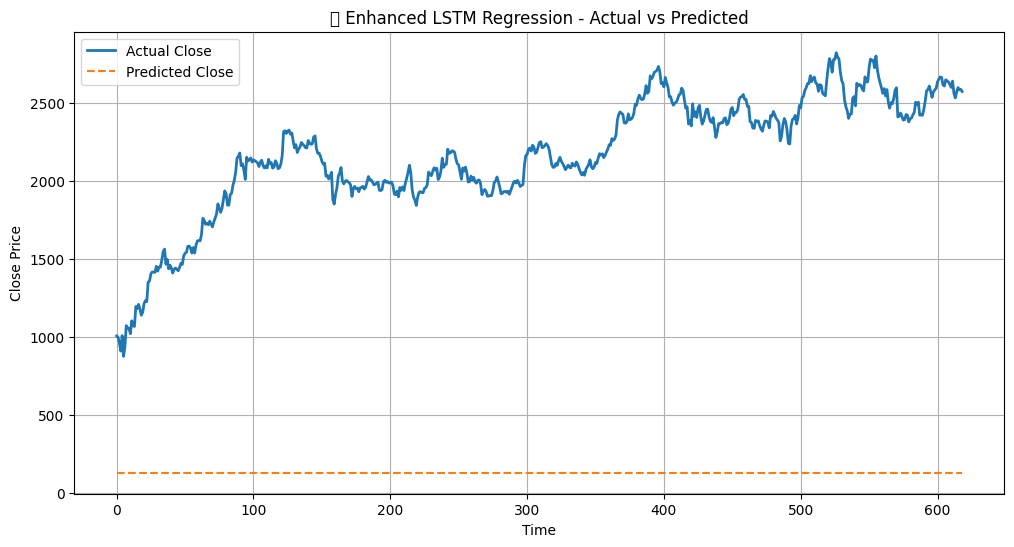

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load dataset
data = pd.read_csv('/content/Data set sheet.csv')

# Clean data
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

data.replace('#DIV/0!', np.nan, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Create target for regression
target_reg = data['Close']
features = data.drop(columns=['Close'])

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Create sequences
look_back = 10
def create_sequences(X, y, time_steps=look_back):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, target_reg.values)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False
)

# LSTM Regression Model
reg_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
reg_model.compile(optimizer='adam', loss='mse')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_reg_model.h5", monitor="val_loss", save_best_only=True)

# Train regression
print(" Training Enhanced Regression Model...")
history = reg_model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop, checkpoint], verbose=1)

# Predict Regression
y_pred = reg_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#  Print Regression Report
print(f"\n Enhanced Regression Report")
print(f" RMSE: {rmse:.4f}")
print(f" MAE: {mae:.4f}")
print(f" R² Score: {r2:.4f}")

#  Plot Predictions - Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Close', linewidth=2)
plt.plot(y_pred, label='Predicted Close', linestyle='--')
plt.title(" Enhanced LSTM Regression - Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

 Dataset Split:
  Training samples: 2472
  Testing samples:  619
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5086 - loss: 0.6969 - val_accuracy: 0.4604 - val_loss: 0.6975
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5274 - loss: 0.6924 - val_accuracy: 0.4620 - val_loss: 0.7017
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4927 - loss: 0.6939 - val_accuracy: 0.4653 - val_loss: 0.6969
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5117 - loss: 0.6946 - val_accuracy: 0.4540 - val_loss: 0.7022
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5045 - loss: 0.6933 - val_accuracy: 0.5380 - val_loss: 0.6911
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5017 - loss: 0.6951 - val_accuracy: 0.4620 - val_loss: 0.6973
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5118 - loss: 0.6930 - val_accuracy: 0.4782 - val_loss: 0.6954
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5089 - loss: 0.6925 - val_accuracy: 0.4701 - val_l

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



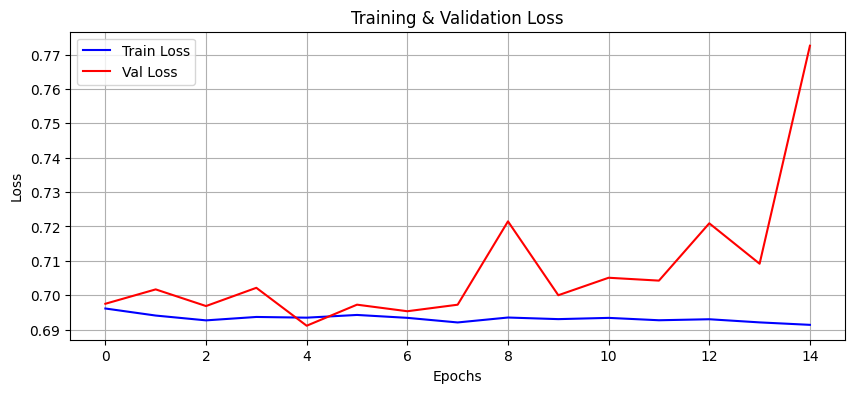

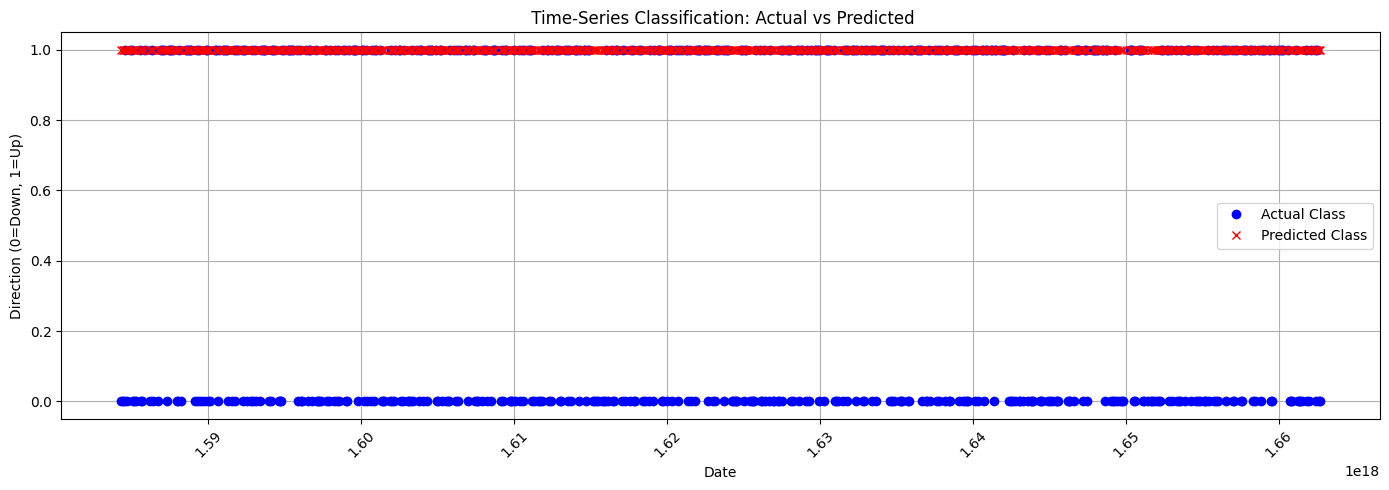

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Data set sheet.csv')

# Parse date if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    df['Date'] = pd.date_range(start='1/1/2000', periods=len(df), freq='D')  # fallback

# Drop unnecessary and clean
df.replace('#DIV/0!', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Create Target Class: 1 if next Close > current Close
df['Target_Class'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)  # Remove last row with NaN

# Separate features and target
features = df.drop(columns=['Close', 'Target_Class', 'Date'])
target = df['Target_Class']
dates = df['Date']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(features)

# Sequence generator
look_back = 10
def create_sequences(X, y, date_seq, time_steps=look_back):
    Xs, ys, ds = [], [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
        ds.append(date_seq[i])
    return np.array(Xs), np.array(ys), np.array(ds)

X_seq, y_seq, date_seq = create_sequences(X_scaled, target.values, dates.values)

# Split into training and testing sets
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X_seq, y_seq, date_seq, test_size=0.2, random_state=42, shuffle=False
)

# Display dataset split info
print(f" Dataset Split:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples:  {X_test.shape[0]}")

# Class weights for imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build Sequential LSTM Model with Dropout
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#  Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

#  Plot Training History
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#  Time Series Plot
plt.figure(figsize=(14, 5))
plt.plot(date_test, y_test, 'bo', label='Actual Class')
plt.plot(date_test, y_pred, 'rx', label='Predicted Class')
plt.title(" Time-Series Classification: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Direction (0=Down, 1=Up)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the model
model = Sequential()

# First LSTM layer (returns sequences)
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Dropout layer
model.add(Dropout(0.2))

# Output Dense layer
model.add(Dense(units=1))  # Use units=1 for regression or binary classification

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0358
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0017
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0017
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0015
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0017
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0015
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0017
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0014
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0014
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0012
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


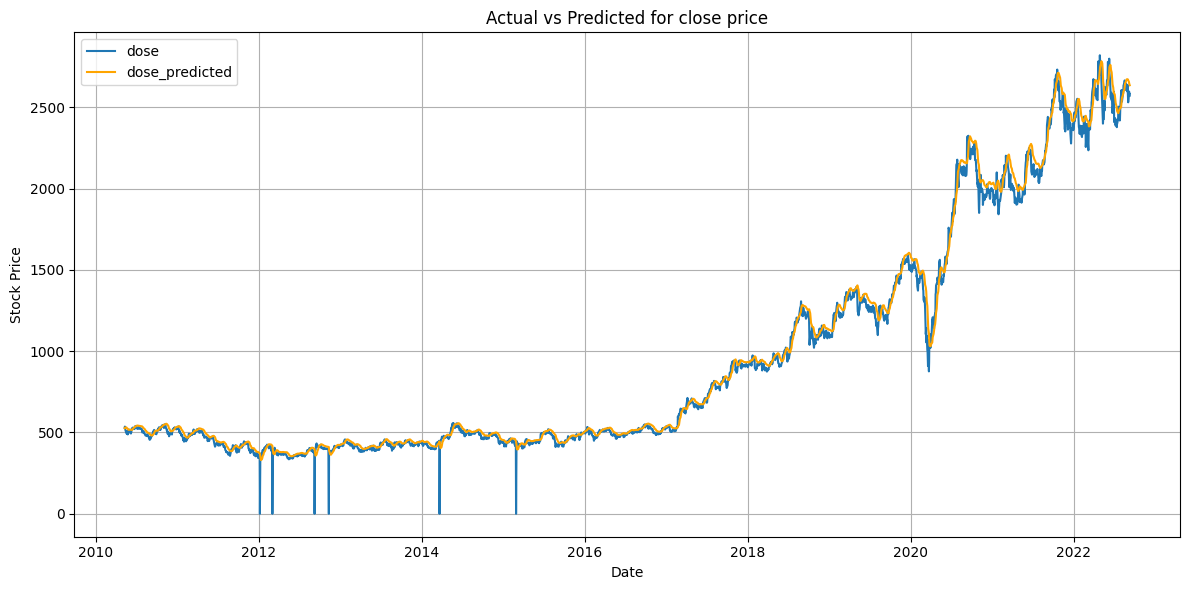

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 1. Load your stock data
df = pd.read_csv('/content/Data set sheet.csv')  # replace with your actual CSV
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']]

# 2. Normalize the close prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Prepare training data
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Reshape
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 4. Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
model.fit(X, y, epochs=10, batch_size=32)

# 6. Make predictions
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# 7. Plot
plt.figure(figsize=(12,6))
plt.plot(df.index[60:], real_prices, label='dose')
plt.plot(df.index[60:], predicted_prices, label='dose_predicted', color='orange')
plt.title("Actual vs Predicted for close price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0399
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0027
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0026
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0021
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0020
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0024
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0019
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0015
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0017
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0016
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


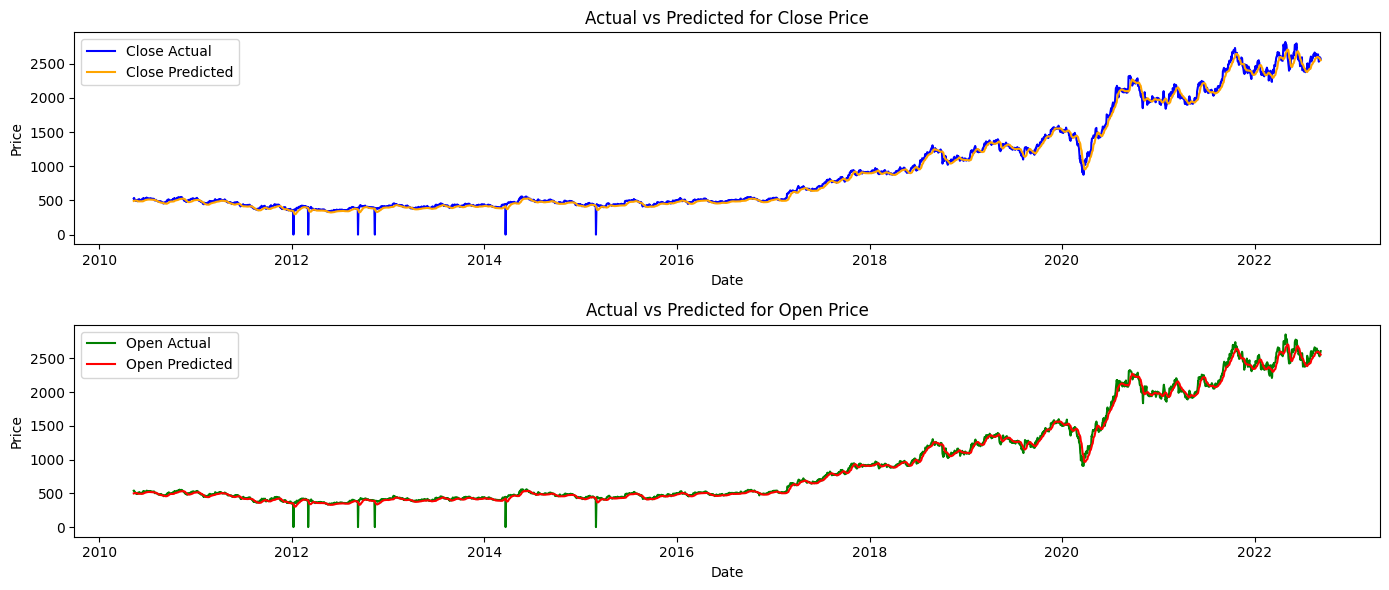

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 1. Load and prepare your data
df = pd.read_csv('/content/Data set sheet.csv')  # Replace with your actual file
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close']]

# 2. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Prepare the data for LSTM
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])  # Now predicting both Open and Close
X, y = np.array(X), np.array(y)

# Reshape
X = np.reshape(X, (X.shape[0], X.shape[1], 2))  # Two features: Open, Close

# 4. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 2)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=2))  # Two outputs: Open, Close
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the model
model.fit(X, y, epochs=10, batch_size=32)

# 6. Make predictions
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y)

# 7. Plot results
dates = df.index[60:]

plt.figure(figsize=(14, 6))

# Plot Close prices
plt.subplot(2, 1, 1)
plt.plot(dates, real_prices[:, 1], label='Close Actual', color='blue')
plt.plot(dates, predicted_prices[:, 1], label='Close Predicted', color='orange')
plt.title('Actual vs Predicted for Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Open prices
plt.subplot(2, 1, 2)
plt.plot(dates, real_prices[:, 0], label='Open Actual', color='green')
plt.plot(dates, predicted_prices[:, 0], label='Open Predicted', color='red')
plt.title('Actual vs Predicted for Open Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0343
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0026
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0025
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0021
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0020
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0019
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0017
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0017
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0018
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0014
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


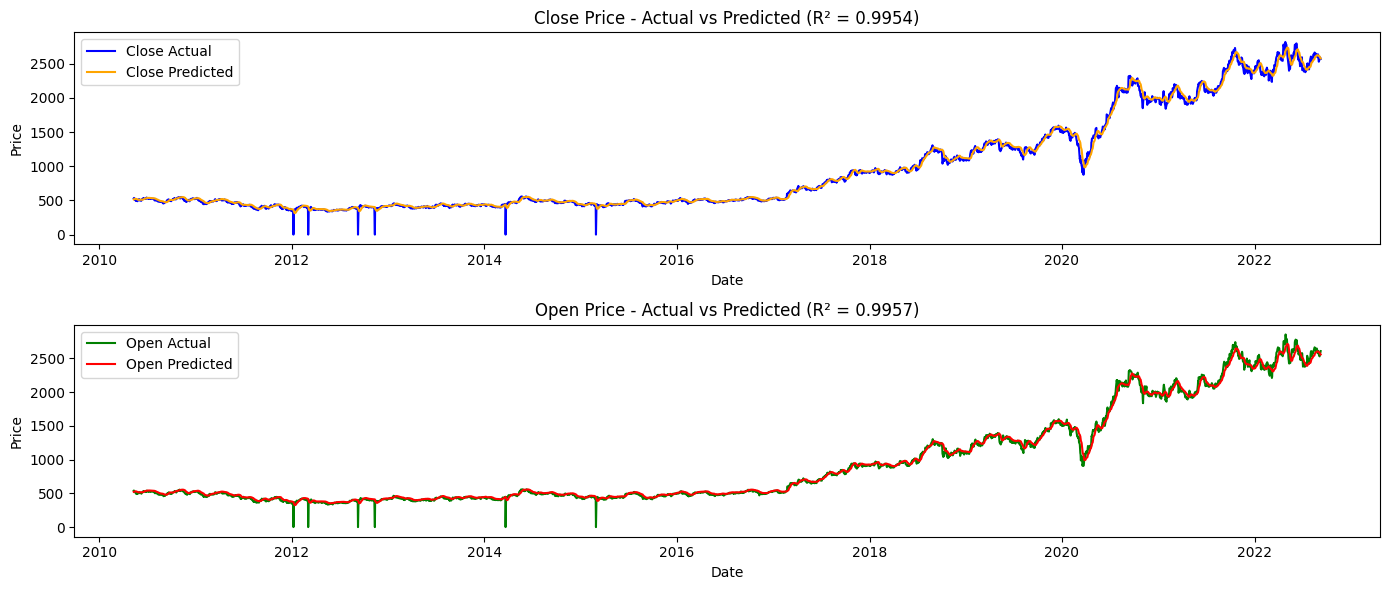

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# 1. Load and prepare your data
df = pd.read_csv('/content/Data set sheet.csv')  # Replace with your file
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Open', 'Close']]

# 2. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 3. Create training sequences
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])  # y will have both Open and Close
X, y = np.array(X), np.array(y)

# 4. Reshape input for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 2))  # Two features

# 5. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 2)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=2))  # Predicting both Open and Close
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model
model.fit(X, y, epochs=10, batch_size=32)

# 7. Predict and inverse scale
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y)

# 8. R2 Score
r2_open = r2_score(real_prices[:, 0], predicted_prices[:, 0])
r2_close = r2_score(real_prices[:, 1], predicted_prices[:, 1])

# 9. Plotting
dates = df.index[60:]

plt.figure(figsize=(14, 6))

# --- Close Plot ---
plt.subplot(2, 1, 1)
plt.plot(dates, real_prices[:, 1], label='Close Actual', color='blue')
plt.plot(dates, predicted_prices[:, 1], label='Close Predicted', color='orange')
plt.title(f'Close Price - Actual vs Predicted (R² = {r2_close:.4f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# --- Open Plot ---
plt.subplot(2, 1, 2)
plt.plot(dates, real_prices[:, 0], label='Open Actual', color='green')
plt.plot(dates, predicted_prices[:, 0], label='Open Predicted', color='red')
plt.title(f'Open Price - Actual vs Predicted (R² = {r2_open:.4f})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()